#  Построить модели для классификации или регресии 

In [1]:
#  KNN, LMNN, ENN,

In [2]:
#install packets
!pip3 install pylmnn
!pip3 install enn
!pip3 install matplotlib

You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
pip install GPyOpt

  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83628 sha256=13120957cd5c43345bef3f205d0037c76d9fdf559cc19322655e7e57d5f53081
  Stored in directory: c:\users\olya\appdata\local\pip\cache\wheels\e6\fa\d1\f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102556 sha256=1b5ed758f40eae4487680b3579dabcbb9961162f979934763a8ea810c9031b7e
  Stored in directory: c:\users\olya\appdata\local\pip\cache\wheels\c8\95\f5\ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPyOpt paramz
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib

from enn.enn import ENN
from pylmnn import LargeMarginNearestNeighbor as LMNN
from scipy.spatial.distance import euclidean, mahalanobis
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsRegressor, NearestNeighbors

# matplotlib.style.use('seaborn')


## Построить модели для классификации или регресии для датасета 

In [11]:
from glob import glob
import os
import glob
import pickle
#pip install tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.DataFrame()  

PATH_TO_DATA = 'HW_13_wine_dataset'

pd.set_option('precision', 3)

#csv_file_path = glob.glob(os.path.join("HW_13_wine_dataset", "*.csv"))
#for file in csv_file_path:
#    df = df.append(pd.read_csv(file, sep=';'))
#    df.head()
#    print(df)

# wine_red

In [12]:
csv_file_path_1 = glob.glob(os.path.join( "HW_13_wine_dataset", "winequality-red.csv"))
for file in csv_file_path_1:
    df_wine_red = df.append(pd.read_csv(file, sep=';'))
    df_wine_red.head()
    
df_wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5


In [13]:
df_wine_red.shape

(1599, 12)

In [14]:
df_wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [15]:
quality = df_wine_red['quality'].groupby(df_wine_red['quality']).count()
quality

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

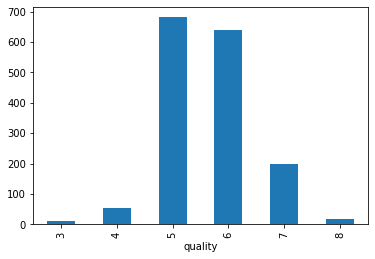

In [16]:
quality.plot(kind='bar');

In [41]:
# get column titles except the last column (отримати заголовки стовпців, окрім останнього)
features=df_wine_red.columns[:-1].tolist()
#print(features)
# get data set features }(отримати функції набору даних; array значень без 'quality')
X=df_wine_red[features].values
#print(X)
# get labels (отримати позначки  array значень 'quality')
y=df_wine_red['quality'].values
#print(y)
# split data to train data set and test data set (розділити дані для тренування на випадкові підмножини набору даних та тестового набору даних у співвідношенні 0,2 до 0,8) )
#random_state -одинакові навчальні та перевірочні сети щоб використовувати одинакові вхідні дані
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train,X_test,y_train,y_test)
# store scores of KNN model by K=1 to 31 (зберігайте бали моделі KNN на K = 1 до 31)
scores=[]

[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [ 5.2    0.34   0.    ...  3.68   0.79  14.   ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]] [[ 8.8   0.41  0.64 ...  3.54  0.66 10.5 ]
 [ 8.7   0.63  0.28 ...  3.26  0.63 10.2 ]
 [10.4   0.34  0.58 ...  3.19  0.7  11.3 ]
 ...
 [ 7.1   0.67  0.   ...  3.44  0.54  9.4 ]
 [ 6.2   0.39  0.43 ...  3.45  0.87 11.2 ]
 [10.9   0.32  0.52 ...  3.28  0.77 11.5 ]] [6 5 6 ... 6 6 8] [5 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 6 5 5 5 6 6 5 6 6 6 6 6 6 7 6 6 5 6 5 6 5
 7 6 5 6 5 5 6 5 6 5 5 5 6 5 4 7 5 5 6 6 6 5 5 5 6 5 6 5 6 7 6 6 6 5 6 6 6
 5 5 6 6 5 6 5 5 5 6 5 5 5 7 5 6 5 7 5 6 5 5 6 5 3 6 5 5 5 5 5 5 6 6 5 6 7
 5 6 6 5 7 5 5 5 5 4 7 7 5 5 5 6 5 7 7 6 5 7 5 6 7 5 7 6 6 5 6 6 5 6 6 6 5
 6 6 6 6 5 6 5 7 5 6 6 6 8 6 5 5 6 6 4 5 5 6 6 6 4 7 5 6 5 5 5 5 6 6 5 6 6
 6 7 6 4 6 5 6 6 5 6 5 4 5 6 5 7 5 7 5 7 6 

In [42]:
# loop k from 3 to 8, and get cross validation score of each K value (в циклі k від 3 до 8,отримують перехресне підтвердження кожного знач.K)
for k in range(3,8):
    knn=KNeighborsClassifier(k) #from sklearn.neighbors(класифікатор, що реалізує голосування k-найближчих сусідів)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=5) 
    print(X_train)
    #from sklearn.model_selection (оцінка оцінки за допомогою перехресної перевірки 5- кількість складок у (Stratified)KFold)
    score_mean=score_val.mean()
    scores.append(score_mean)  #запис балів моделі KNN)
#print(knn)
#print(score_val)
#print(score_mean)
print(scores)

[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [ 5.2    0.34   0.    ...  3.68   0.79  14.   ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]]
[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [ 5.2    0.34   0.    ...  3.68   0.79  14.   ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]]
[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [ 5.2    0.34   0.    ...  3.68   0.79  14.   ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]]
[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [

In [43]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array
#отримати індекс максимальної оцінки(np.argmax) вздовж осі, за замовчуванням axis=0 для 1 розмірного масиву D-1
best_k=np.argmax(scores)+1  # Only the first occurrence is returned (Повертається лише перше значення)
print(best_k)
# generate KNN model (згенеруємо модель KNN)
knn=KNeighborsClassifier(best_k)
# fit with train data set (надавати train data set)
knn.fit(X_train,y_train)
# get Modes presicion rate using test set  
#отримати передбачення набору режиму за допомогою тестового набору(точнїсть прогнозування:)
print("prediction precision rate:",knn.score(X_test,y_test))

2
prediction precision rate: 0.540625


In [45]:
 X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [44]:
scores=[]
# loop k from 3 to 8, and get cross validation score of each K value(в циклі k від 3 до 8,отримують перехресне підтвердження кожного значення K)
k_test, n_components, max_iter = 5, X.shape[1], 180
for k in range(3,8):
    # Instantiate the metric learner (Ігноруйте навчальний показник)
    lmnn = LMNN(n_neighbors=k, max_iter=max_iter, n_components=n_components)
    # Train the metric learner (Тренування навчального показника)
    lmnn.fit(X_train, y_train)
    # Fit the nearest neighbors classifier (Підібір класифікатора найближчих сусідів)
    knn = KNeighborsClassifier(n_neighbors=k_test)
    knn.fit(lmnn.transform(X_train), y_train)
    score_val=cross_val_score(knn,lmnn.transform(X_train),y_train,scoring='accuracy',cv=5)
    score_mean=score_val.mean()
    scores.append(score_mean)
print('score:', scores)



score: [0.5308762254901961, 0.5473039215686274, 0.526985294117647, 0.5441666666666667, 0.537922794117647]


In [21]:
# get index of maxium score along axis, default axis=0 for 1 dimensional array 
#отримати індекс максимальної оцінки вздовж осі, за замовчуванням вісь = 0 для 1 розмірного масиву
best_k=np.argmax(scores)+1
print(best_k)
# Instantiate the metric learner (Ігноруйте навчальний показник)
lmnn = LMNN(n_neighbors=int(best_k), max_iter=max_iter, n_components=n_components)
# Train the metric learner (Тренуйте навчального показника)
lmnn.fit(X_train, y_train)
# generate KNN model (згенеруйте кnn модель)
knn=KNeighborsClassifier(n_neighbors=best_k)
# fit with train data set (підходить rain data set )
knn.fit(lmnn.transform(X_train), y_train)
# get Modes presicion rate using test set (отримати передбачення ставки, що використовується в тестовому наборі)
print("prediction precision rate:",knn.score(lmnn.transform(X_test),y_test))

2
prediction precision rate: 0.56875


In [22]:
clf = ENN()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
print('Train scores')
print('accuracy_score = ', accuracy_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred, average='macro'))
print('recall_score = ', recall_score(y_test, y_pred, average='macro'))
print('f1_score = ', f1_score(y_test, y_pred, average='macro'))

ENN(distance_function=<function euclidean at 0x00000000090605E8>, k=3)
Train scores
accuracy_score =  0.440625
precision_score =  0.248362824532766
recall_score =  0.3126309842727753
f1_score =  0.24947482612813868


In [23]:
# Улучшение скора(Отримання збалансованого зразку шляхом надмірного збору)
# Get balanced sample by oversampling
df3=df_wine_red[df_wine_red['quality']==3]
df3=pd.concat([df3]*63)
df3
df4=df_wine_red[df_wine_red['quality']==4]
df4=pd.concat([df4]*12)
df5=df_wine_red[df_wine_red['quality']==5]
df6=df_wine_red[df_wine_red['quality']==6]

df7=df_wine_red[df_wine_red['quality']==7]
df7=pd.concat([df7]*3)
df8=df_wine_red[df_wine_red['quality']==8]
df8=pd.concat([df8]*35)
df_balanced=pd.concat([df3,df4,df5,df6,df7,df8])
df_balanced.shape

(3812, 12)

In [24]:
quality = df_balanced['quality'].groupby(df_balanced['quality']).count()

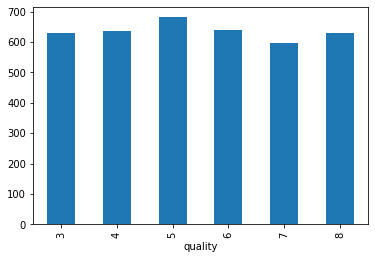

In [25]:
quality.plot(kind='bar')

In [26]:
# df.columns is column labels property (властивість міток стовпців)
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [27]:
scores=[]
for i in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))

best K is: 1
prediction precision rate: 0.8676277850589778


In [28]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [29]:
print(neigh.predict([[1.5]]))

[0.5]


In [30]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(radius=1.6, n_neighbors=2)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.6)

In [31]:
# Predict value (Прогнозуйте значення)
print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5, 1.5]]), array([[2, 1]], dtype=int64))


In [32]:
rng = neigh.radius_neighbors([[1., 1., 1.]])
# Distance to points (Відстань до балів)
print(np.asarray(rng[0][0]))
# Index of points (Index балів)
print(np.asarray(rng[1][0]))

[1.5 0.5]
[1 2]


In [33]:
    
df_wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5
